In [9]:
ty = torch.nn.functional.sigmoid(x)

In [1]:
import sys
sys.path.append('../')

import torch
import time
from Config.gan_xre_options import *
from Data import CreateDataLoader
from Model import create_model
from Utils.visualizer import Visualizer
import numpy as np


# opt = gan_xre_2d()
opt = gan_xre_unetbase3d
data_loader = CreateDataLoader(opt)


dataset = data_loader.load_data()
dataset_size = len(data_loader)
print('#training images = %d' % dataset_size)

model = create_model(opt)

CustomDatasetDataLoader
dataset [AlignedDataset_XR] was created
#training images = 23774
p2p_xr
-----Initialize Model-----
normalization method [instance]
initialization method [normal]
normalization method [instance]
initialization method [normal]
test
---------- Networks initialized -------------
UnetGenerator2(
  (model): U_Net(
    (Maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (Conv1): conv_block(
      (conv): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (Conv2): conv_block(
      (conv): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), strid

..\Model\networks.py:22: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias.data, 0.0)


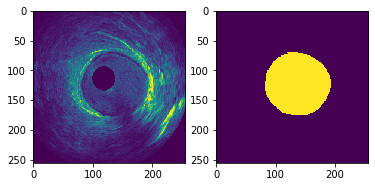

In [2]:
td = dataset.dataset.__getitem__(20)

x = td['A'].unsqueeze(0).cuda()
y2 = td['B'].unsqueeze(0).cuda()

import pylab as plt
plt.subplot(1,2,1)
plt.imshow(x.cpu().detach().numpy()[0,0])
plt.subplot(1,2,2)
plt.imshow(y2.cpu().detach().numpy()[0,0])

In [4]:
y = model.netG(x)

In [5]:
y.shape,y2.max()

(torch.Size([1, 1, 256, 256]), tensor(1., device='cuda:0'))

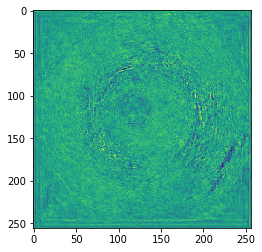

In [6]:
plt.imshow(y.cpu().detach().numpy()[0,0])

In [7]:
model.criterionL1(y,y2)

tensor(0.4104, device='cuda:0', grad_fn=<MeanBackward0>)

In [6]:
from Model.losses import *

In [27]:
one_hot(torch.cat((1-y2,y2),1))

True

In [14]:
y2.shape

torch.Size([1, 1, 256, 256])

In [15]:
one_hot(y2)

(False, False)

In [22]:
torch.cat((1-y2,y2),1).shape

torch.Size([1, 2, 256, 256])

In [23]:
one_hot(torch.cat((1-y2,y2),1))

True

In [10]:
simplex(torch.cat((1-y,y),1))

True